### Flow:
1. 取得資料
2. 切分資料集為訓練、測試
3. 檢視訓練資料
4. 清理與準備訓練資料
5. 訓練與選擇模型
6. 調整模型
7. 驗證與解釋模型
8. 發佈模型

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=True)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [10]:
X, Y = mnist['data'][:1000], mnist['target'][:1000]

In [11]:
data = X.copy()
data["y"] = Y

data.to_csv("mnist.csv")

In [12]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
Y

0      5
1      0
2      4
3      1
4      9
      ..
995    7
996    6
997    0
998    3
999    6
Name: class, Length: 1000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [14]:
Y.value_counts()

class
7    117
1    116
4    105
9    100
2     99
0     97
6     94
3     93
5     92
8     87
Name: count, dtype: int64

In [15]:
x = np.array(X)
y = np.array(Y)

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=1)

In [17]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((700, 784), (300, 784), (700,), (300,))

In [25]:
def show_img(index):
    img = x_train[index].reshape(28, 28)
    plt.imshow(img, cmap='binary')
    plt.title(f'Index: {index} / Label: {y_train[index]}')
    plt.show()

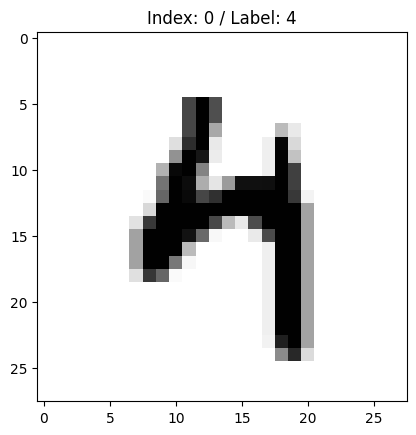

In [26]:
show_img(0)

In [27]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
x_train_prep = std.fit_transform(x_train)

In [28]:
from sklearn.model_selection import cross_val_score

### Softmax Regression

In [30]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss='log_loss', random_state=1)
sgd_scores = cross_val_score(sgd_clf, x_train_prep, y_train, cv=10, scoring='accuracy')
sgd_scores

array([0.78571429, 0.8       , 0.78571429, 0.88571429, 0.81428571,
       0.87142857, 0.85714286, 0.9       , 0.95714286, 0.84285714])

In [31]:
sgd_scores.mean(), sgd_scores.std()

(0.85, 0.052779866291174767)

### SVC

In [33]:
from sklearn.svm import SVC

svc_clf = SVC(random_state=1)
svc_scores = cross_val_score(svc_clf, x_train_prep, y_train, cv=10, scoring='accuracy')
svc_scores

array([0.8       , 0.8       , 0.81428571, 0.9       , 0.82857143,
       0.84285714, 0.88571429, 0.9       , 0.91428571, 0.87142857])

In [34]:
svc_scores.mean(), svc_scores.std()

(0.8557142857142859, 0.04162514938380989)

### RandomForestClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=1)

rf_scores = cross_val_score(rf_clf, x_train, y_train, cv=10, scoring='accuracy')
rf_scores

array([0.81428571, 0.84285714, 0.87142857, 0.94285714, 0.85714286,
       0.88571429, 0.91428571, 0.91428571, 0.92857143, 0.85714286])

In [41]:
rf_scores.mean(), rf_scores.std()

(0.8828571428571429, 0.03927922024247863)

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid = [
  {
    'n_estimators': [100, 300, 500],
    'max_features': [4, 8, 12],
  },
  {
    'bootstrap': [False],
    'n_estimators': [300, 500],
    'max_features': [8, 12],
  }
]

rf_clf = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(x_train, y_train)
grid_search.best_params_

{'bootstrap': False, 'max_features': 8, 'n_estimators': 300}

In [44]:
rlt = grid_search.cv_results_

for mean_score, params in zip(rlt['mean_test_score'], rlt['params']):
    print(mean_score, params)

0.8742857142857142 {'max_features': 4, 'n_estimators': 100}
0.8842857142857143 {'max_features': 4, 'n_estimators': 300}
0.8800000000000001 {'max_features': 4, 'n_estimators': 500}
0.8657142857142857 {'max_features': 8, 'n_estimators': 100}
0.8871428571428572 {'max_features': 8, 'n_estimators': 300}
0.8828571428571429 {'max_features': 8, 'n_estimators': 500}
0.8857142857142858 {'max_features': 12, 'n_estimators': 100}
0.8914285714285715 {'max_features': 12, 'n_estimators': 300}
0.8842857142857143 {'max_features': 12, 'n_estimators': 500}
0.9014285714285715 {'bootstrap': False, 'max_features': 8, 'n_estimators': 300}
0.9014285714285715 {'bootstrap': False, 'max_features': 8, 'n_estimators': 500}
0.8957142857142857 {'bootstrap': False, 'max_features': 12, 'n_estimators': 300}
0.8957142857142857 {'bootstrap': False, 'max_features': 12, 'n_estimators': 500}


In [45]:
best_model = grid_search.best_estimator_

In [46]:
best_model.score(x_test, y_test)

0.89

In [47]:
from sklearn.metrics import confusion_matrix

y_test_pred = best_model.predict(x_test)
conf = confusion_matrix(y_test, y_test_pred)
conf

array([[29,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  1, 26,  0,  0,  0,  1,  1,  0,  0],
       [ 1,  0,  0, 25,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  1,  0,  0,  0],
       [ 0,  0,  1,  2,  1, 22,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  1,  0, 27,  0,  0,  0],
       [ 0,  3,  0,  0,  1,  0,  0, 31,  0,  0],
       [ 0,  1,  0,  3,  0,  1,  1,  0, 19,  1],
       [ 1,  0,  0,  1,  0,  0,  1,  3,  0, 24]])

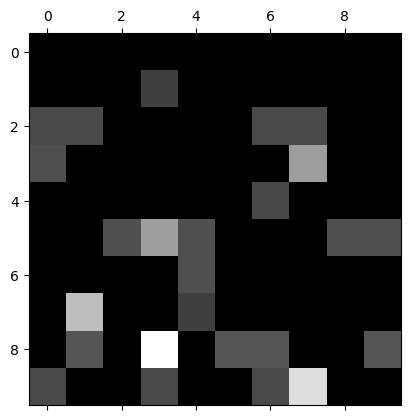

In [48]:
row_sums = conf.sum(axis=1, keepdims=True)
norm_conf = conf / row_sums
np.fill_diagonal(norm_conf, 0)
plt.matshow(norm_conf, cmap='gray')
plt.show()

In [49]:
imp = best_model.feature_importances_

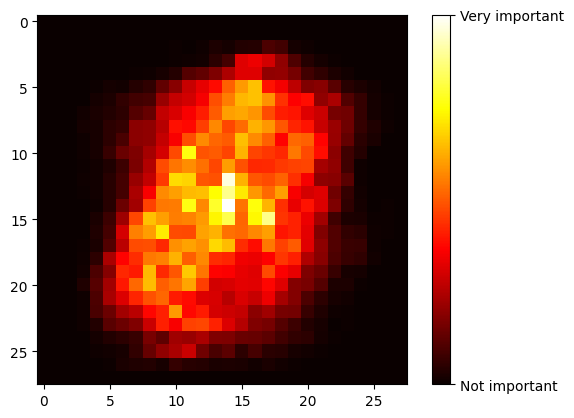

In [52]:
import matplotlib as mpl

plt.imshow(imp.reshape(28, 28), cmap=mpl.cm.hot)
cbar = plt.colorbar(ticks=[imp.min(), imp.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()


In [53]:
final_model = best_model

In [54]:
import joblib

joblib.dump(final_model, 'mnist_rf.pkl')

['mnist_rf.pkl']

In [55]:
model_clf_loaded = joblib.load('mnist_rf.pkl')

model_clf_loaded.predict(x_test[:10])

array(['3', '4', '0', '6', '3', '7', '9', '6', '2', '3'], dtype=object)